<a href="https://colab.research.google.com/github/dharanya667/-analyzing-data-from-a-bank-s-marketing-campaign/blob/main/Bank_Term_Deposit_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary: Client Subscribed to a Term Deposit


## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.


In [45]:
#  Loaded and inspected the bankmarketing.csv dataset.

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/intern proj 2.csv')

# Display the first few rows
print(df.head())

# Get information about the dataset
print(df.info())

# Get descriptive statistics
print(df.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [46]:
#  Handled missing values and performed necessary data cleaning.

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Handle missing values (Example: Impute with mode for categorical, median for numerical)
# Assuming missing values are represented by a placeholder like 'unknown' or empty strings
# Identify columns that might need cleaning based on .info() and .describe() output
# Let's assume 'job', 'marital', 'education', 'contact', 'poutcome' might have 'unknown'
categorical_cols_to_clean = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in categorical_cols_to_clean:
    if col in df.columns:
        df[col] = df[col].replace('unknown', df[col].mode()[0])

# For numerical columns, we can check for NaN or other placeholders
# Assuming no explicit NaNs based on the describe() output, but if there were:
# numerical_cols_to_clean = ['balance', 'duration', 'campaign', 'pdays', 'previous'] # Add relevant numerical columns
# for col in numerical_cols_to_clean:
#     if col in df.columns:
#         df[col] = df[col].fillna(df[col].median()) # Example: fill NaN with median

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Further data cleaning based on domain knowledge or initial inspection
# For example, 'duration' column has a significant impact on the target variable 'y'.
# According to the dataset description, duration=0 means the call was not made.
# It's usually best to drop 'duration' before training a predictive model as the duration is known after the outcome.
# However, for exploratory analysis, we might keep it.
# Let's assume for now we keep 'duration' but might consider dropping it later for modeling.

# Inspect unique values in the original 'y' column before mapping
print("\nUnique values in original 'y' column:", df['y'].unique())

# Check the data type of the 'y' column
print("\nData type of original 'y' column:", df['y'].dtype)

# Convert 'y' column to numerical (0 for 'no', 1 for 'yes')
# Use .loc to avoid potential SettingWithCopyWarning if df is a slice
df.loc[:, 'y_numeric'] = df['y'].map({'no': 0, 'yes': 1})

# Inspect the resulting 'y_numeric' column
print("\nValue counts for 'y_numeric' after mapping:")
print(df['y_numeric'].value_counts(dropna=False))
print("\nNumber of non-null values in 'y_numeric':", df['y_numeric'].notna().sum())


# Inspect data types again after potential cleaning/conversion
print("\nData types after cleaning:")
print(df.info())


Missing values before cleaning:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing values after cleaning:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unique values in original 'y' column: ['no' 'yes']

Data type of ori

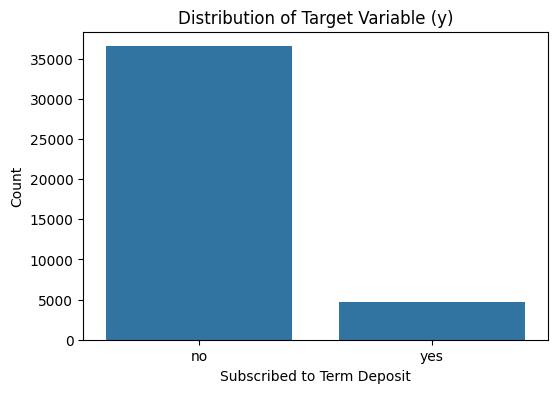

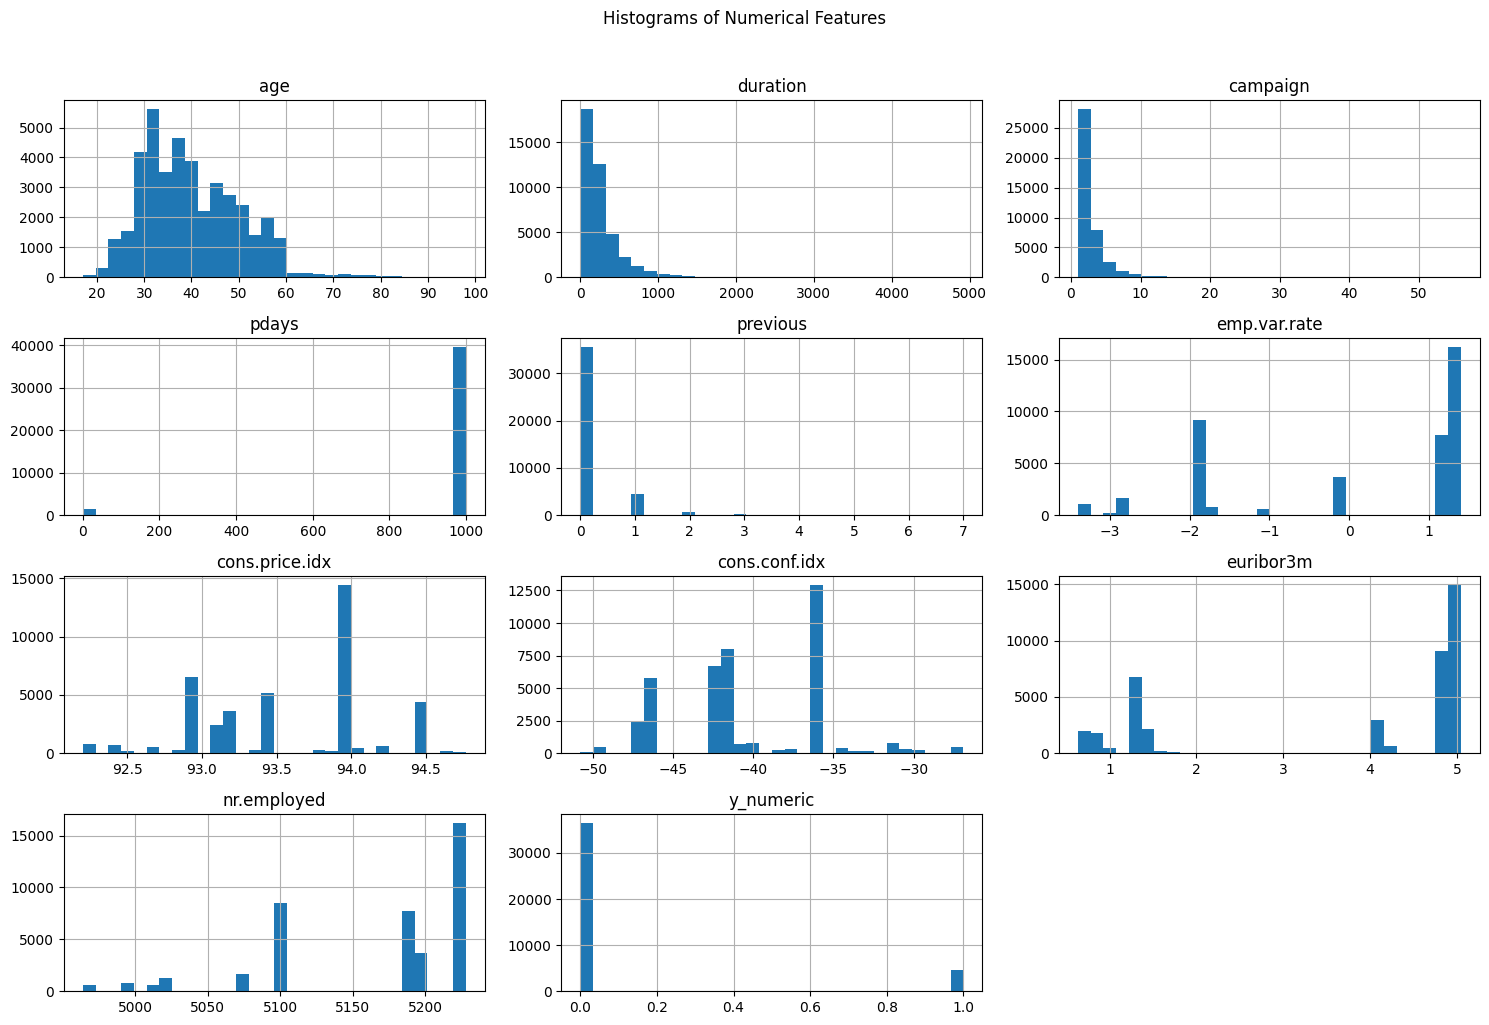

In [47]:
# prompt: Conducted exploratory data analysis (EDA) to identify key patterns and relationships.                                                     give a code like this # EDA - Univariate Analysis
# # Distribution of the target variable 'y' (term deposit subscription)
# plt.figure(figsize=(6, 4))
# sns.countplot(x='y', data=df)
# plt.title('Distribution of Target Variable (y)')
# plt.xlabel('Subscribed to Term Deposit')
# plt.ylabel('Count')
# plt.show()
# # Distribution of numerical features
# numerical_cols = df.select_dtypes(include=np.number).columns
# df[numerical_cols].hist(bins=30, figsize=(15, 10))
# plt.suptitle('Histograms of Numerical Features', y=1.02, ha='center')
# plt.tight_layout()
# plt.show()
# # Distribution of categorical features
# categorical_cols = df.select_dtypes(include='object').columns
# for col in categorical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(y=col, data=df, order = df[col].value_counts().index)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA - Univariate Analysis
# Distribution of the target variable 'y' (term deposit subscription)
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# Distribution of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02, ha='center')
plt.tight_layout()
plt.show()



In [48]:
# Encoded categorical variables and normalized numerical features.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Separate features and target variable
X = df.drop(['y', 'y_numeric'], axis=1)
y = df['y_numeric']

# Identify categorical and numerical columns from the features DataFrame
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' is useful for unseen categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing
# The preprocessor returns a sparse matrix for one-hot encoded categorical features by default.
# You can convert it to a dense array if needed, but many models can handle sparse matrices.
X_processed = preprocessor.fit_transform(X)

print("\nShape of processed features (X):", X_processed.shape)
print("\nShape of target variable (y):", y.shape)
print("\nFirst 5 rows of processed features (sparse or dense array):")
print(X_processed[:5])


Shape of processed features (X): (41188, 60)

Shape of target variable (y): (41188,)

First 5 rows of processed features (sparse or dense array):
[[ 1.53303429  0.01047142 -0.56592197  0.1954139  -0.34949428  0.64809227
   0.72272247  0.88644656  0.71245988  0.33167991  0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   1.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.        ]
 [ 1.62899323 -0.42150051 -0.56592197  0.1954139  -0.34949428  0.64809227
   0.72272247  0.88644656  0.71245988  0.33167991  0.          0.
   0.          0.          0.       

In [49]:
#  Split the data into training and testing sets.

from sklearn.model_selection import train_test_split

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Check the distribution of the target variable in train and test sets to ensure stratification worked
print("\nDistribution of y in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of y in test set:")
print(y_test.value_counts(normalize=True))


Shape of X_train: (32950, 60)
Shape of X_test: (8238, 60)
Shape of y_train: (32950,)
Shape of y_test: (8238,)

Distribution of y in training set:
y_numeric
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Distribution of y in test set:
y_numeric
0    0.887351
1    0.112649
Name: proportion, dtype: float64



--- Training Logistic Regression ---
Logistic Regression Evaluation:
  Accuracy: 0.9162
  Precision: 0.7088
  Recall: 0.4353
  F1 Score: 0.5394
  ROC AUC: 0.9424
  Confusion Matrix:
[[7144  166]
 [ 524  404]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238


--- Training Decision Tree ---
Decision Tree Evaluation:
  Accuracy: 0.8943
  Precision: 0.5311
  Recall: 0.5248
  F1 Score: 0.5279
  ROC AUC: 0.7330
  Confusion Matrix:
[[6880  430]
 [ 441  487]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.52      0.53       928

    accuracy                           0.89      82

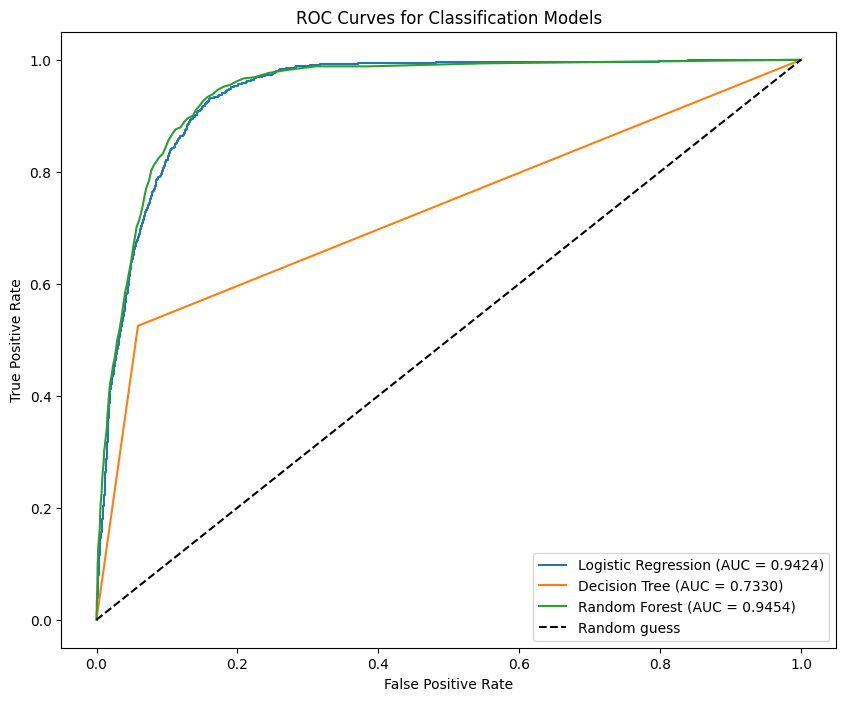

In [50]:
# prompt: Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' is good for small datasets and handles L2 penalty
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")

    # Create a pipeline that includes preprocessing and the model
    # Note: Since we already applied the preprocessor to get X_processed,
    # we don't need the preprocessor within *this* pipeline.
    # If we hadn't preprocessed upfront, the pipeline would look like:
    # Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    # For now, we just fit the model to the already processed data.
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("  Confusion Matrix:")
    print(conf_matrix)
    print("  Classification Report:")
    print(class_report)

# Optionally, you can display results in a DataFrame for easier comparison
results_df = pd.DataFrame({name: {k: v for k, v in res.items() if k not in ['Confusion Matrix', 'Classification Report']} for name, res in results.items()}).T
print("\n--- Model Comparison Summary ---")
print(results_df)

# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # For models that support predict_proba (like LR and RF, but not all DT variations by default)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    else:
         # For models without predict_proba, ROC AUC cannot be calculated this way
         print(f"Model {model_name} does not support predict_proba for ROC curve.")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.show()

In [51]:
# prompt: Measured model performance using accuracy, precision, recall, and F1-score. give code

# Evaluate the model
# Assuming you have trained a model and have y_test and y_pred
# For example, using the last trained model in the loop above
# model = models["Random Forest"] # Or any other model
# y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# You can also get the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# And the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9171
Precision: 0.6985
Recall: 0.4644
F1 Score: 0.5579

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.70      0.46      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238


Confusion Matrix:
[[7124  186]
 [ 497  431]]



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
